### values of x and b in y=5x+3

In [451]:
import random
import time
x= random.sample(range(-1000,1000),100)
print('x' , x)
y = [5*i + 3 for i in x]
print ('y' , y)

x [497, 816, 430, -73, 488, 892, 117, -599, -914, 950, 630, -172, 13, 999, 17, 426, 429, -640, 619, -362, 256, 368, 149, -303, -899, 188, 384, 154, 706, 551, -888, 809, -955, 262, 637, -287, -354, 523, 645, -415, -866, 162, -791, -80, -356, -950, -197, 721, 598, -991, -166, -728, -470, 121, -129, -964, -941, -610, -756, 527, 221, 592, -872, 743, 803, 571, -188, -626, 33, 611, -867, -306, 925, 867, -770, 676, 607, -575, 148, -760, 448, -684, -579, -550, -477, 984, -841, -420, 515, 122, 814, 888, 166, -261, -272, -240, 969, 312, -905, -727]
y [2488, 4083, 2153, -362, 2443, 4463, 588, -2992, -4567, 4753, 3153, -857, 68, 4998, 88, 2133, 2148, -3197, 3098, -1807, 1283, 1843, 748, -1512, -4492, 943, 1923, 773, 3533, 2758, -4437, 4048, -4772, 1313, 3188, -1432, -1767, 2618, 3228, -2072, -4327, 813, -3952, -397, -1777, -4747, -982, 3608, 2993, -4952, -827, -3637, -2347, 608, -642, -4817, -4702, -3047, -3777, 2638, 1108, 2963, -4357, 3718, 4018, 2858, -937, -3127, 168, 3058, -4332, -1527, 4628,

### adding noise

In [452]:
noice_index = random.sample(range(0,100),10)
for i in noice_index:
    y[i] += 1000

### adding outlier

In [453]:
outlier_index = random.sample(range(0,100),5)
print(outlier_index)
outliers = [0,4029,1.567,5003,4]
for i in range(len(outlier_index)):
    y[outlier_index[i]] = outliers[i]

[81, 33, 19, 72, 69]


### creating dataframe

In [454]:
import pandas as pd
df = pd.DataFrame(list(zip(x,y)),columns=['x','y'])
# print (df.head)

### train-test split


In [455]:
from sklearn.model_selection import train_test_split

x_data = df.drop(['y'],axis=1)
y_data = df['y']

train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, random_state = 0)

### linear regression model

In [456]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x,train_y)


print('coef:', reg.coef_)

print('intercept"',reg.intercept_)
start_time = time.time()
result_y = reg.predict(val_x)
end_time = time.time()

print ("time taken:",end_time-start_time, 'seconds')

training_score = reg.score(train_x,train_y)
print('training_score: ', training_score)

test_score = reg.score(val_x,val_y)
print('test_score: ', test_score)

coef: [4.79480603]
intercept" 167.0990167004767
time taken: 0.003996133804321289 seconds
training_score:  0.9544807831404449
test_score:  0.9636101578328817


Text(0, 0.5, 'predicted_y')

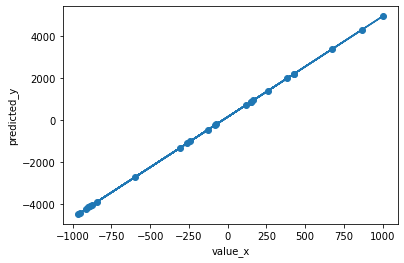

In [457]:
import matplotlib.pyplot as plt
plt.plot(val_x,result_y, marker='o')
plt.xlabel ('value_x')
plt.ylabel ('predicted_y')

### DecisionTreeRegressor

In [458]:

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(train_x,train_y)

start_time = time.time()
result_y = dtr.predict(val_x)
# print ("reg_result_y:",reg_result_y)
end_time = time.time()

print ("time taken:",end_time-start_time, 'seconds')

training_score = dtr.score(train_x,train_y)
print('training_score: ', training_score)

test_score = dtr.score(val_x,val_y)
print('test_score: ', test_score)

time taken: 0.0039997100830078125 seconds
training_score:  1.0
test_score:  0.9484188447197716


Text(0, 0.5, 'predicted_y')

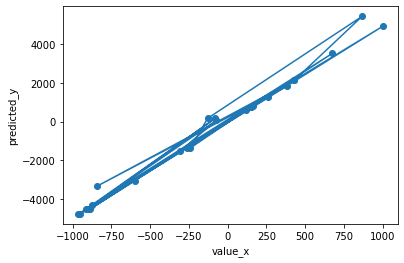

In [459]:
import matplotlib.pyplot as plt
plt.plot(val_x,result_y, marker='o')
plt.xlabel ('value_x')
plt.ylabel ('predicted_y')


### RandomForestRegressor

In [460]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(train_x, train_y)

start_time = time.time()
result_y = rfr.predict(val_x)
# print ("rfr_result_y:",rfr_result_y)
end_time = time.time()

print ("time taken:",end_time-start_time, 'seconds')
training_score = rfr.score(train_x,train_y)
print('training_score: ', training_score)

test_score = rfr.score(val_x,val_y)
print('test_score: ', test_score)



time taken: 0.011993646621704102 seconds
training_score:  0.9901901116411348
test_score:  0.9547141919675212


Text(0, 0.5, 'predicted_y')

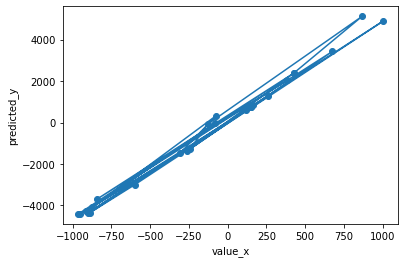

In [461]:
import matplotlib.pyplot as plt
plt.plot(val_x,result_y, marker='o')
plt.xlabel ('value_x')
plt.ylabel ('predicted_y')


### SupportVectorRegressor

In [462]:
from sklearn.svm import SVR
svr = SVR(C=1.0,epsilon=0.2, kernel="linear").fit(train_x, train_y)

print('coef:', svr.coef_)

print('intercept"',svr.intercept_)

start_time = time.time()
result_y = svr.predict(val_x)
# print ("svr_result_y:",svr_result_y)
end_time = time.time()

print ("time taken:",end_time-start_time, 'seconds')
training_score = svr.score(train_x,train_y)
print('training_score: ', training_score)

test_score = svr.score(val_x,val_y)
print('test_score: ', test_score)


coef: [[5.]]
intercept" [3.2]
time taken: 0.003996372222900391 seconds
training_score:  0.9500837146076574
test_score:  0.9634936702462489


Text(0, 0.5, 'predicted_y')

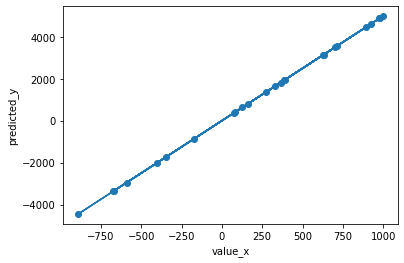

In [450]:
import matplotlib.pyplot as plt
plt.plot(val_x,result_y, marker='o')
plt.xlabel ('value_x')
plt.ylabel ('predicted_y')